<a href="https://colab.research.google.com/github/DaniilAszn/ILoveMath/blob/main/MathColabFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math symbols: https://russianblogs.com/article/18521116359/

## График чисел Фибоначчи

Введите количество чисел: 10


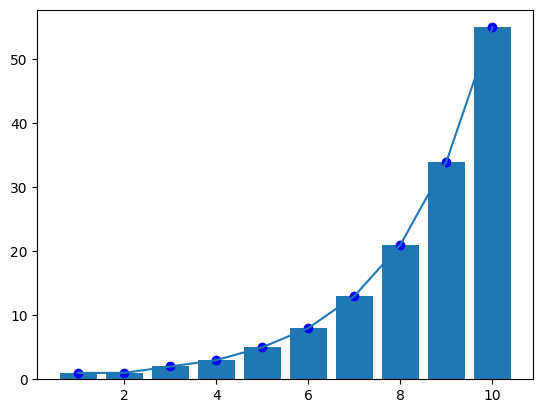

In [3]:
from functools import lru_cache
import matplotlib.pyplot as plt
%matplotlib inline


@lru_cache(None)
def Fib(n: int) -> int:
    '''
    Fib numbers
    '''
    if (n <= 2):
        return 1
    else:
        return Fib(n-1) + Fib(n-2)

# Генерация точек
n = int(input("Введите количество чисел: "))
X = []
Y = []
for i in range(1, n + 1):
    X.append(i)
    Y.append(Fib(i))

# Построение графика
plt.plot(X, Y)
plt.bar(X, Y)
plt.scatter(X, Y, c='blue')
plt.show()

## Жадный алгоритм раскраски графа



Хроматическое число графа = 3


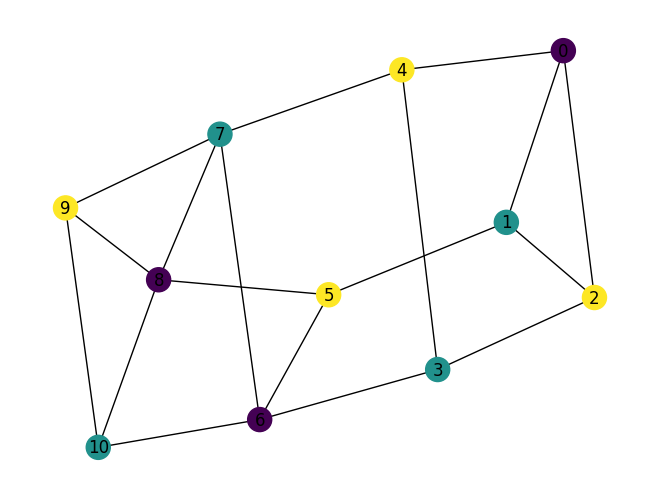

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


def greedy_coloring(graph) -> dict:
    '''
    Greedy coloring algorithm
    '''
    # Создаем словарь для хранения раскраски вершин графа
    coloring = {}

    # Получаем список вершин графа в порядке убывания степени
    vertices = sorted(graph.nodes(), key=lambda x: graph.degree(x), reverse=True)

    # Проходим по списку вершин и раскрашиваем их
    for vertex in vertices:
        # Получаем цвета всех соседних вершин
        neighbor_colors = {coloring[neighbor] for neighbor in graph.neighbors(vertex) if neighbor in coloring}

        # Находим наименьший доступный цвет. Он будет отличаться от всех соседних цветов
        color = 1
        while color in neighbor_colors:
            color += 1

        # Записываем выбранный цвет для текущей вершины
        coloring[vertex] = color

    return coloring


# Создаем неориентированный граф без петель
graph = nx.Graph()

# Задаём графы в виде списка соединённых вершин
# graph.add_edges_from([(1, 2), (1, 8), (1, 6), (1, 7), (1, 3), (2, 6), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6)])
graph.add_edges_from([(0, 1), (0, 2), (0, 4), (1, 2), (1, 5), (2, 3), (3, 4), (3, 6), (4, 7), (5, 6), (5, 8), (6, 7), (7, 8), (8, 9), (9, 10), (10, 6), (10, 9), (7, 9), (8, 10)])


# Вызываем функцию раскраски графа
coloring = greedy_coloring(graph)

count_of_coloring = 0
# Выводим результаты раскраски
for vertex, color in coloring.items():
  # print(f"Вершина раскрашена в цвет {color}")
  if color > count_of_coloring:
    count_of_coloring = color

# Хроматическое число графа:
print(f'Хроматическое число графа = {count_of_coloring}')

# Визуализируем граф с раскраской
nx.draw(graph, with_labels=True, node_color=[coloring.get(vertex, 0) for vertex in graph.nodes()])
plt.show()

## Построение поверхности

Input length: 30


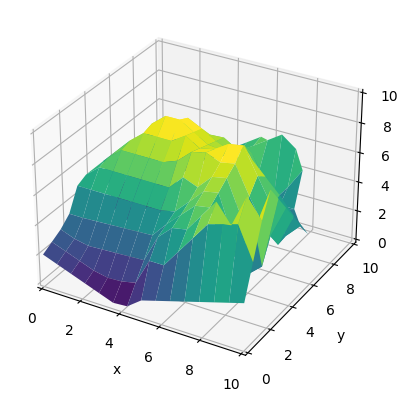

In [ ]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from random import randint

# ТОЧКИ, ПО КОТОРЫМ СТРОИТСЯ ПОВЕРХНОСТЬ
# X = [1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7]
# Y = [1, 4, 5, 6, 1, 4, 5, 6, 1, 4, 5, 6]
# Z = [2, 6, 3, 6, 2, 7, 4, 6, 2, 4, 2, 3]

X = []
Y = []
Z = []

n = int(input('Input length: '))

for i in range(n):
    X.append(int(randint(0, 10)))
    Y.append(int(randint(0, 10)))
    Z.append(int(randint(0, 10)))

# ПОСТРОЕНИЕ ПОВЕРХНОСТИ
plotx, ploty, = np.meshgrid(np.linspace(np.min(X), np.max(X), 15), np.linspace(np.min(Y), np.max(Y), 15))
plotz = interp.griddata((X, Y), Z, (plotx, ploty), method='linear')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plotx, ploty, plotz, cstride=1, rstride=1, cmap='viridis')

# МАСШТАБИРОВАНИЕ
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

# ПОДПИСЫВАЕМ КАЖДУЮ ИЗ ОСЕЙ
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Градиентный спуск

-0.0033546956386789548


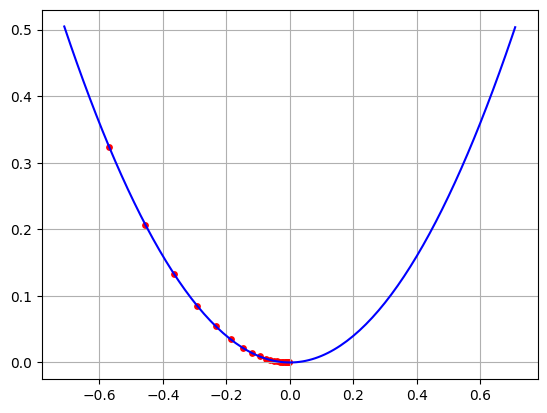

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(x: int) -> int:
    '''
    Function
    '''
    return x ** 2


def df(x: int) -> int:
    '''
    Derivative of a function
    '''
    return 2 * x

# Инициализация начальных значений
epsilon = 0.001
eta = 0.1
n = 1000
x_old = np.random.uniform(-3, 4)

# График параболы х ** 2
arguments = np.arange(- abs(x_old), abs(x_old), 0.01)
parabola = arguments ** 2

# Точки на параболе
x_dots = []
y_dots = []

# Алгоритм градиентного спуска
for i in range(n):
    x_new = x_old - eta * df(x_old)
    x_dots.append(x_new)
    y_dots.append(f(x_new))
    # print(f'{i + 1} итерация:, x(t) = {x_new}, x(t-1) = {x_old}')
    if abs(x_new - x_old) < epsilon:
        break
    x_old = x_new

# Точка, которая оказалась ближе всего к минимуму
print(x_new)

# Построение графика
plt.plot(arguments, parabola, c='blue')
plt.scatter(x_dots, y_dots, s=15, c='red')
plt.grid()
plt.show()

# Вычисление квадратного корня

### $\sqrt{\alpha^2 + \beta} \approx \alpha + \frac{\beta}{2 \alpha}$

### $Пример: \sqrt{8} = \sqrt{3^2 + (-1)} \approx 3 + \frac{-1}{2\cdot3} = 3 - \frac{1}{6} = \frac{17}{6} = 2\frac{5}{6}$

In [9]:
import math as m


def binary_search(array: list, key: int):
    '''
    Search of number
    '''
    left = 0
    right = len(array) - 1
    while left <= right:
        mid = (left + right) // 2
        if (array[mid] == key):
            return True, mid
        elif (array[mid] > key):
            right = mid - 1
        elif (array[mid] < key):
            left = mid + 1

    return False, -1


def list_of_square(x: int) -> tuple:
    '''
    Create a list of squares
    '''
    return tuple([i ** 2 for i in range(x)])



x = int(input('Введите число, корень из которого хотите извлечь: '))

set_of_squares = list_of_square(x)

flag, index = binary_search(set_of_squares, x)
if flag:
    print(index)
else:
    temp_left = x - 1
    hl = 1
    while temp_left > 0:
        templ_flag, indexl = binary_search(set_of_squares, temp_left)
        if templ_flag:
            break
        temp_left -= 1
        hl += 1

    temp_right = x + 1
    hr = 1
    while temp_right < set_of_squares[-1]:
        tempr_flag, indexr = binary_search(set_of_squares, temp_right)
        if tempr_flag:
            break
        temp_right += 1
        hr += 1

if hl < hr:
    alpha = indexl
else:
    alpha = indexr

beta = x - alpha ** 2

print(f'Квадратый корень из {x} равен {(alpha + beta / (2 * alpha))}')

Введите число, корень из которого хотите извлечь: 8
Квадратый корень из 8 равен 2.8333333333333335


In [ ]:
def sqrt(x: int, precision: int) -> int:
    '''
    "X ** 0.5" for losers
    '''
    if x < 0:
        raise ValueError("Bro! We from R field")

    num = x / 2.0
    while abs(num ** 2 - x) > precision:
        num = (num + x / num) / 2.0

    return round(num, 5)

X = int(input('Введите число, корень из которого хотите извлечь: '))
precisionX = float(input('Введите точность: '))
result = sqrt(X, precisionX)
print(f"Квадратный корень из {X} равен: {result}")


Введите число, корень из которого хотите извлечь: 8
Введите точность: 0.000001
Квадратный корень из 8 равен: 2.82843
